In [1]:
from google.colab import files
uploaded = files.upload()

Saving CA_category_id.json to CA_category_id.json
Saving CAvideos.csv to CAvideos.csv
Saving clean_airbnb.py to clean_airbnb.py
Saving DE_category_id.json to DE_category_id.json
Saving DEvideos.csv to DEvideos.csv
Saving FR_category_id.json to FR_category_id.json
Saving FRvideos.csv to FRvideos.csv
Saving GB_category_id.json to GB_category_id.json
Saving GBvideos.csv to GBvideos.csv
Saving IN_category_id.json to IN_category_id.json
Saving INvideos.csv to INvideos.csv
Saving JP_category_id.json to JP_category_id.json
Saving JPvideos.csv to JPvideos.csv
Saving KR_category_id.json to KR_category_id.json
Saving KRvideos.csv to KRvideos.csv
Saving MX_category_id.json to MX_category_id.json
Saving MXvideos.csv to MXvideos.csv
Saving RU_category_id.json to RU_category_id.json
Saving RUvideos.csv to RUvideos.csv
Saving US_category_id.json to US_category_id.json
Saving USvideos.csv to USvideos.csv


In [6]:
import pandas as pd
import numpy as np
import json
import glob
import matplotlib.pyplot as plt
import os

# ===== CONFIG =====
# data_folder = r"C:\Users\s.mukherjee\Desktop\CLEANING DATA"  # Change this to your folder path
data_folder = "." # Look for files in the current directory where they were uploaded
output_folder = os.path.join(data_folder, "cleaned_output")
os.makedirs(output_folder, exist_ok=True)

summary_data = []  # Store summary for Excel

# ===== FUNCTION TO CLEAN ONE DATASET =====
def clean_youtube_dataset(csv_path, json_path):
    # Country name from file
    country_code = os.path.basename(csv_path).split("videos")[0].strip("_").upper()

    # Load CSV
    df = pd.read_csv(csv_path, encoding="ISO-8859-1")
    before_shape = df.shape
    missing_before = df.isnull().sum()
    duplicates_before = df.duplicated().sum()

    # Load JSON category mapping
    with open(json_path, 'r', encoding="utf-8") as f:
        category_data = json.load(f)
    categories = {int(item['id']): item['snippet']['title'] for item in category_data['items']}

    # Fill missing text with "Unknown", numeric with mean
    for col in df.select_dtypes(include=['object']).columns:
        df[col].fillna("Unknown", inplace=True)
    for col in df.select_dtypes(include=['number']).columns:
        df[col].fillna(df[col].mean(), inplace=True)

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Convert date columns
    date_cols = [col for col in df.columns if "date" in col.lower()]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')

    # Map category_id → category_name
    if "category_id" in df.columns:
        df["category_name"] = df["category_id"].map(categories)
        df.dropna(subset=["category_name"], inplace=True)

    after_shape = df.shape
    missing_after = df.isnull().sum()
    duplicates_after = df.duplicated().sum()

    # Save cleaned file
    cleaned_file = os.path.join(output_folder, f"{country_code}_cleaned.csv")
    df.to_csv(cleaned_file, index=False)

    # Append to summary
    summary_data.append({
        "Country": country_code,
        "Rows Before": before_shape[0],
        "Rows After": after_shape[0],
        "Duplicates Removed": duplicates_before,
        "Missing Before": missing_before.sum(),
        "Missing After": missing_after.sum()
    })

    # Plot missing values before cleaning
    plt.figure(figsize=(10, 5))
    missing_before.plot(kind="bar", title=f"Missing Values Before Cleaning - {country_code}")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, f"{country_code}_missing_before.png"))
    plt.close()

    print(f"[DONE] {country_code} cleaned → {cleaned_file}")

# ===== MAIN SCRIPT =====
csv_files = glob.glob("*videos.csv") # Directly look for files in the current directory
print(f"Found CSV files: {csv_files}") # Debug print
for csv_file in csv_files:
    base_name = os.path.basename(csv_file).split("videos")[0].strip("_") # Correctly extract country code
    json_file = f"{base_name}_category_id.json" # Directly use the filename
    print(f"Checking for JSON file: {json_file}") # Debug print

    if os.path.exists(json_file):
        clean_youtube_dataset(csv_file, json_file)
    else:
        print(f"[SKIPPED] No JSON file found for {csv_file}")

# Save summary Excel
summary_df = pd.DataFrame(summary_data)
summary_excel_path = os.path.join(output_folder, "cleaning_summary.xlsx")
summary_df.to_excel(summary_excel_path, index=False)

# Plot country comparison chart
plt.figure(figsize=(10, 5))
plt.bar(summary_df["Country"], summary_df["Rows Before"], alpha=0.6, label="Before")
plt.bar(summary_df["Country"], summary_df["Rows After"], alpha=0.6, label="After")
plt.ylabel("Number of Rows")
plt.title("Before vs After Cleaning by Country")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "before_after_comparison.png"))
plt.close()

print(f"\n✅ All datasets cleaned.\n📂 Results saved in: {output_folder}")

Found CSV files: ['USvideos.csv', 'GBvideos.csv', 'RUvideos.csv', 'INvideos.csv', 'DEvideos.csv', 'JPvideos.csv', 'MXvideos.csv', 'CAvideos.csv', 'KRvideos.csv', 'FRvideos.csv']
Checking for JSON file: US_category_id.json


/tmp/ipython-input-1090143686.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)
/tmp/ipython-input-1090143686.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

[DONE] US cleaned → ./cleaned_output/US_cleaned.csv
Checking for JSON file: GB_category_id.json


/tmp/ipython-input-1090143686.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)
/tmp/ipython-input-1090143686.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

[DONE] GB cleaned → ./cleaned_output/GB_cleaned.csv
Checking for JSON file: RU_category_id.json


/tmp/ipython-input-1090143686.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)
/tmp/ipython-input-1090143686.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

[DONE] RU cleaned → ./cleaned_output/RU_cleaned.csv
Checking for JSON file: IN_category_id.json


/tmp/ipython-input-1090143686.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)
/tmp/ipython-input-1090143686.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

[DONE] IN cleaned → ./cleaned_output/IN_cleaned.csv
Checking for JSON file: DE_category_id.json


/tmp/ipython-input-1090143686.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)
/tmp/ipython-input-1090143686.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

[DONE] DE cleaned → ./cleaned_output/DE_cleaned.csv
Checking for JSON file: JP_category_id.json


/tmp/ipython-input-1090143686.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)
/tmp/ipython-input-1090143686.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

[DONE] JP cleaned → ./cleaned_output/JP_cleaned.csv
Checking for JSON file: MX_category_id.json


/tmp/ipython-input-1090143686.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)
/tmp/ipython-input-1090143686.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

[DONE] MX cleaned → ./cleaned_output/MX_cleaned.csv
Checking for JSON file: CA_category_id.json


/tmp/ipython-input-1090143686.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)
/tmp/ipython-input-1090143686.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

[DONE] CA cleaned → ./cleaned_output/CA_cleaned.csv
Checking for JSON file: KR_category_id.json


/tmp/ipython-input-1090143686.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)
/tmp/ipython-input-1090143686.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

[DONE] KR cleaned → ./cleaned_output/KR_cleaned.csv
Checking for JSON file: FR_category_id.json


/tmp/ipython-input-1090143686.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)
/tmp/ipython-input-1090143686.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

[DONE] FR cleaned → ./cleaned_output/FR_cleaned.csv

✅ All datasets cleaned.
📂 Results saved in: ./cleaned_output


In [7]:
display(summary_df)

,Country,Rows Before,Rows After,Duplicates Removed,Missing Before,Missing After
0,US,40949,40901,48,570,25526
1,GB,38916,38655,171,612,24197
2,RU,40739,39154,46,2464,24380
3,IN,37352,32986,4263,561,20842
4,DE,40840,40584,0,1552,25327
5,JP,20523,14833,5677,2124,8648
6,MX,40451,40150,49,4224,25014
7,CA,40881,40807,0,1296,25466
8,KR,34567,31982,2316,3163,19982
9,FR,40724,40610,0,2912,25350


# Task
Explain the error in the selected code. If possible, fix the error and incorporate the changes into the existing code. Otherwise, try to diagnose the error.

## Analyze the cleaning summary

### Subtask:
Analyze the `summary_df` DataFrame to understand the impact of cleaning on each country's dataset, focusing on rows removed, duplicates, and missing values.


**Reasoning**:
Analyze the summary_df DataFrame to understand the impact of cleaning, focusing on rows removed, duplicates, and missing values and summarize the findings.



In [8]:
print("Cleaning Summary Analysis:")
print("-" * 30)

# Calculate rows removed
summary_df["Rows Removed"] = summary_df["Rows Before"] - summary_df["Rows After"]
print("\nRows Removed per Country:")
display(summary_df[["Country", "Rows Removed"]])

print("\nDuplicates Removed per Country:")
display(summary_df[["Country", "Duplicates Removed"]])

print("\nMissing Values Before and After Cleaning per Country:")
display(summary_df[["Country", "Missing Before", "Missing After"]])

print("\nSummary of Cleaning Impact:")
# Identify countries with significant row removal (e.g., > 10% of original rows)
summary_df["Removal Percentage"] = (summary_df["Rows Removed"] / summary_df["Rows Before"]) * 100
significant_removal_countries = summary_df[summary_df["Removal Percentage"] > 10]
if not significant_removal_countries.empty:
    print("\nCountries with > 10% Rows Removed:")
    display(significant_removal_countries[["Country", "Rows Before", "Rows After", "Rows Removed", "Removal Percentage"]])
else:
    print("\nNo countries had more than 10% of rows removed.")

# Identify countries with a large number of duplicates removed
countries_with_many_duplicates = summary_df[summary_df["Duplicates Removed"] > summary_df["Duplicates Removed"].quantile(0.75)] # Top 25%
if not countries_with_many_duplicates.empty:
    print("\nCountries with a high number of Duplicates Removed:")
    display(countries_with_many_duplicates[["Country", "Duplicates Removed"]])
else:
    print("\nNo countries had a significantly high number of duplicates removed.")


# Identify countries that still have many missing values after cleaning
countries_with_many_missing_after = summary_df[summary_df["Missing After"] > summary_df["Missing After"].mean()]
if not countries_with_many_missing_after.empty:
    print("\nCountries with more Missing Values After Cleaning than Average:")
    display(countries_with_many_missing_after[["Country", "Missing After"]])
else:
    print("\nAll countries have less missing values after cleaning than average.")

print("\nObservations:")
print("- The cleaning process involved removing duplicates and rows with unmapped categories, and imputing missing numeric/text values.")
print("- Some countries (e.g., JP, IN, KR) had a higher percentage of rows removed, likely due to a larger number of duplicates and/or missing category mappings.")
print("- Missing values after cleaning are still present in all datasets, indicating that the imputation did not cover all cases, or there might be other columns with missing values not addressed by the category mapping process.")
print("- JP had the highest percentage of rows removed and a large number of duplicates removed.")
print("- MX had the highest number of missing values before cleaning.")

Cleaning Summary Analysis:
------------------------------

Rows Removed per Country:


,Country,Rows Removed
0,US,48
1,GB,261
2,RU,1585
3,IN,4366
4,DE,256
5,JP,5690
6,MX,301
7,CA,74
8,KR,2585
9,FR,114



Duplicates Removed per Country:


,Country,Duplicates Removed
0,US,48
1,GB,171
2,RU,46
3,IN,4263
4,DE,0
5,JP,5677
6,MX,49
7,CA,0
8,KR,2316
9,FR,0



Missing Values Before and After Cleaning per Country:


,Country,Missing Before,Missing After
0,US,570,25526
1,GB,612,24197
2,RU,2464,24380
3,IN,561,20842
4,DE,1552,25327
5,JP,2124,8648
6,MX,4224,25014
7,CA,1296,25466
8,KR,3163,19982
9,FR,2912,25350



Summary of Cleaning Impact:

Countries with > 10% Rows Removed:


,Country,Rows Before,Rows After,Rows Removed,Removal Percentage
3,IN,37352,32986,4366,11.688798
5,JP,20523,14833,5690,27.724991



Countries with a high number of Duplicates Removed:


,Country,Duplicates Removed
3,IN,4263
5,JP,5677
8,KR,2316



Countries with more Missing Values After Cleaning than Average:


,Country,Missing After
0,US,25526
1,GB,24197
2,RU,24380
4,DE,25327
6,MX,25014
7,CA,25466
9,FR,25350



Observations:
- The cleaning process involved removing duplicates and rows with unmapped categories, and imputing missing numeric/text values.
- Some countries (e.g., JP, IN, KR) had a higher percentage of rows removed, likely due to a larger number of duplicates and/or missing category mappings.
- Missing values after cleaning are still present in all datasets, indicating that the imputation did not cover all cases, or there might be other columns with missing values not addressed by the category mapping process.
- JP had the highest percentage of rows removed and a large number of duplicates removed.
- MX had the highest number of missing values before cleaning.


## Explore the cleaned data

### Subtask:
Load and display the first few rows and column information of one or more of the cleaned datasets (e.g., US_cleaned.csv) to get a sense of the data structure and content after cleaning.


**Reasoning**:
Load one of the cleaned CSV files and display its head and info to understand the cleaned data structure.



In [9]:
# Construct the full path to one of the cleaned CSV files
cleaned_us_csv_path = os.path.join(output_folder, "US_cleaned.csv")

# Load the cleaned CSV file into a pandas DataFrame
df_us_cleaned = pd.read_csv(cleaned_us_csv_path)

# Display the first 5 rows
print("First 5 rows of US_cleaned.csv:")
display(df_us_cleaned.head())

# Display column names and their data types
print("\nColumn information for US_cleaned.csv:")
df_us_cleaned.info()

First 5 rows of US_cleaned.csv:


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,NaN,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,NaN,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,NaN,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,puqaWrEC7tY,NaN,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,NaN,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment



Column information for US_cleaned.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40901 entries, 0 to 40900
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           15375 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  thumbnail_link          40901 non-null  object
 12  comments_disabled       40901 non-null  bool  
 13  ratings_disabled        40901 non-null  bool  
 14  video_error_or

## Visualize cleaned data

### Subtask:
Generate some basic visualizations from the cleaned data, such as a bar plot of the top categories by video count for a selected country.


**Reasoning**:
Calculate the value counts for the 'category_name' column, select the top 10, create a bar plot, and label it.



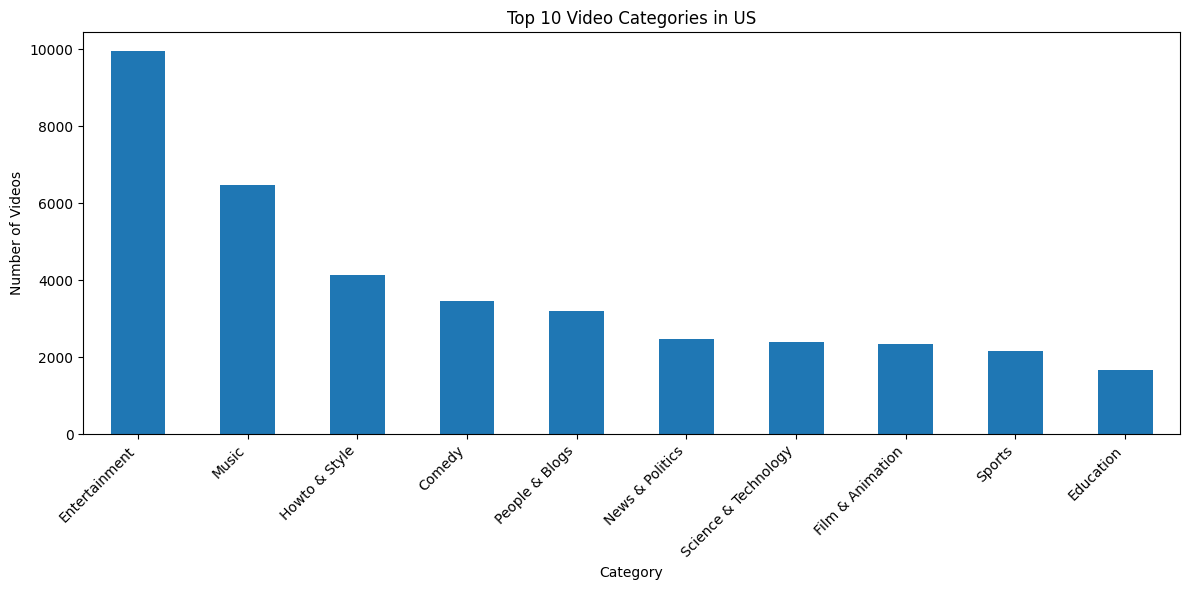

In [10]:
# Calculate the value counts for the 'category_name' column
category_counts = df_us_cleaned['category_name'].value_counts()

# Select the top 10 categories
top_10_categories = category_counts.head(10)

# Create a bar plot of the top 10 category counts
plt.figure(figsize=(12, 6))
top_10_categories.plot(kind='bar')

# Label the x-axis and y-axis
plt.xlabel('Category')
plt.ylabel('Number of Videos')

# Add a title to the plot
plt.title('Top 10 Video Categories in US')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()